# 이것이 취업을 위한 코딩테스트다 with Python

## 코딩테스트란? 
#### 일종의 문제 풀이시험
#### 문제해결역량을 평가, 채점시스템으로 이용됨 

### 1. 그리디 알고리즘 & 구현

- 그리디 알고리즘은 탐욕법은 지금 당장 좋은 것만 고르는 방법
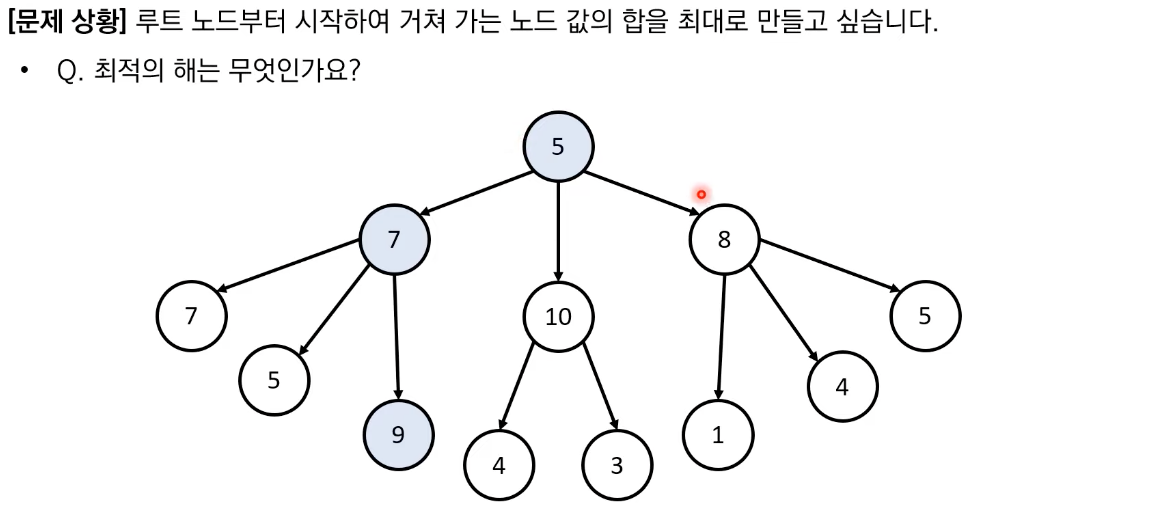
- Q. 최소의 값은? 
- A. 5 -> 7 -> 9

#### 탐욕법으로 얻은 해가 최적의 해가 되는 상황에서 이를 추론할 수 있어야 풀리도록 출제가된다. 

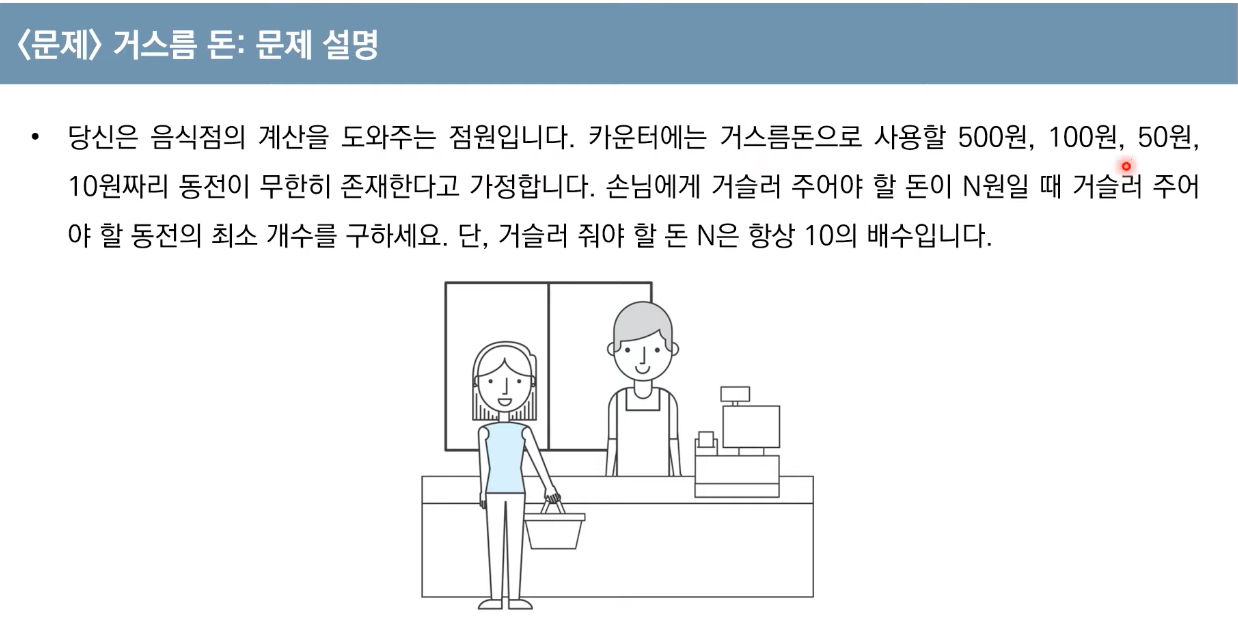

- 최적의 해를 빠르게 구하기 위해서는 가장 큰 화폐단위부터 돈을 거슬러 주면 됨
- 500, 100, 50 10 순으로 거슬러 주면 됨 

### 그렇다면 왜 최적의 해일까? (정당성분석)
- 가지고 있는 동전 중에서 큰 단위가 항상 작은 단위의 배수이므로 작은 단위의 동전들을 종합해 다른 해가 나올 수 없기 때문이다. 
- 만약에 800원을 거슬러줘야하는데 화폐단위가 500원, 400원, 100원이라면???
- 우리의 알고리즘은 500원 1개 100원 3개 ,총 4개 
- 그러나 최적의 해는 400원 2개, 총 2개임 
- 따라서 알고리즘문제에서는 이처럼 문제풀이를 위한 최소한의 아이디어를 떠올리고 이것이 정당한지 검토해야함

In [ ]:
#동전의 최소개수는? 
n = 1260
count = 0 

#큰 단위의 화폐부터 차례대로 익히기 
array = [500, 100, 50, 10]

for coin in array:
    count = count + n//coin #1.2   2. 2+ 2   3. 4+ 1 4. 5+ 1
    n = n % coin            #1.260 2. 60     3. 10.  4. 0
    
print(count)

### 문제분석 
#### 화폐의 종류가 K라고 할때 소스코드의 복잡도는 O(K)이다. 
#### 동전종류에만 영향을 받고, 금액과는 무관함.

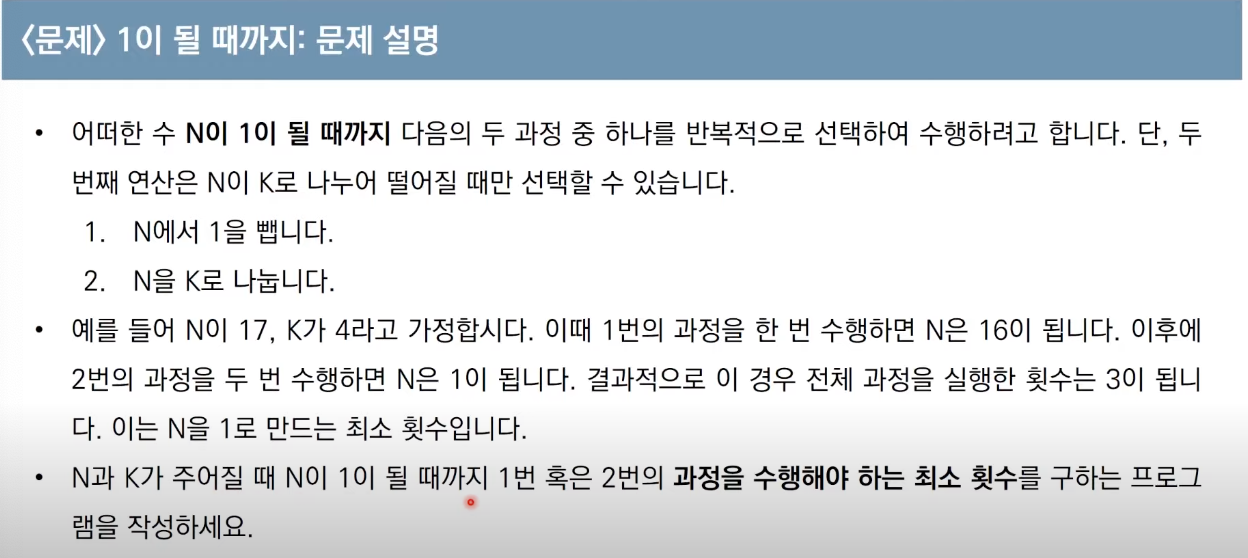

### 내가 푼 풀이

In [10]:
#과정을 수행하는 최소횟수는?

#조건 N,K 는 자연수 + n은 나머지수
N = 25
K = 5
count = 0 

while N!=1:
    if N%K == 1:
        n = N-K 
        N = n #6 #5
        count = count + 1 
    elif N%K == 0:
        n = N/K
        N = n
        count = count + 1
print(count)

2


### 문제해결아이디어
- 주어진 N에 대하여 최대한 많이 나누기를 수행하면된다! 
- 아무리 큰 수여도 나누면 기하급수적으로 줄일수 있음
- 즉, 뺴는 것보다 나누는 것이 1로 만들기 효율적임

In [26]:
n,k = map(int, input().split())

result = 0 

while True:
    target = (n//k) * k 
    result = result + (n-target)
    # 여기서 result는 1이됨.
    n = target
    if n < k:
        break
    #K로 나누기
    result = result + 1 
    # 2 
    n = n//k 
    # n = 5 
    
#마지막으로 남은 수 에 대하여 1씩 빼기 
result = result + (n-1)

print(result)

25 5
2


In [ ]:
# N이 K로 나누어 떨어지는 수가 될때까지 뺴기! 
# 여기서 target이란 k로 나누어 떨어지는 수, 만약에 안떨어지더라도 n과 가장 가까운 수. 
# n= 26이면 target = 5*5 = 25.
# n = 25
#N이 K보다 작을때 (더이상 나눌수 없을때) 반복문 탈출
#1. n=25, k=5

### 일종의 스킬 

In [ ]:
n = 26
k = 5
target = (n//k) * k
# 만약에 n이 k로 안떨어졌을때 n과 가장 가까운 k와 나누어 떨어진 수를 찾을 수 있음 
# 5*5 = 25 
# target은 k로 나누어 떨어진 수

### 🧭 성능비교결과 : 쪼금LOSE

In [32]:
import time
N,K = map(int, input().split())
start_time = time.time() # 측정시작

count = 0 

while N!=1:
    if N%K == 1:
        n = N-K 
        N = n #6 #5
        count = count + 1 
    elif N%K == 0:
        n = N/K
        N = n
        count = count + 1
print(count)
end_time = time.time() #측정종료
print("time:", end_time - start_time) # 수행시간 출력

25 5
2
time: 0.0008549690246582031


In [33]:
import time
n,k = map(int, input().split())
start_time = time.time() # 측정시작

result = 0 

while True:
    # N이 K로 나누어 떨어지는 수가 될때까지 뺴기! 
    target = (n//k) * k
    result = result + (n-target)
    n = target
    #N이 K보다 작을때 (더이상 나눌수 없을때) 반복문 탈출
    if n < k:
        break
    #K로 나누기
    result = result + 1 
    n = n//k 
    
#마지막으로 남은 수 에 대하여 1씩 빼기 
result = result + (n-1)

print(result)
end_time = time.time() #측정종료
print("time:", end_time - start_time) # 수행시간 출력

25 5
2
time: 0.0006742477416992188


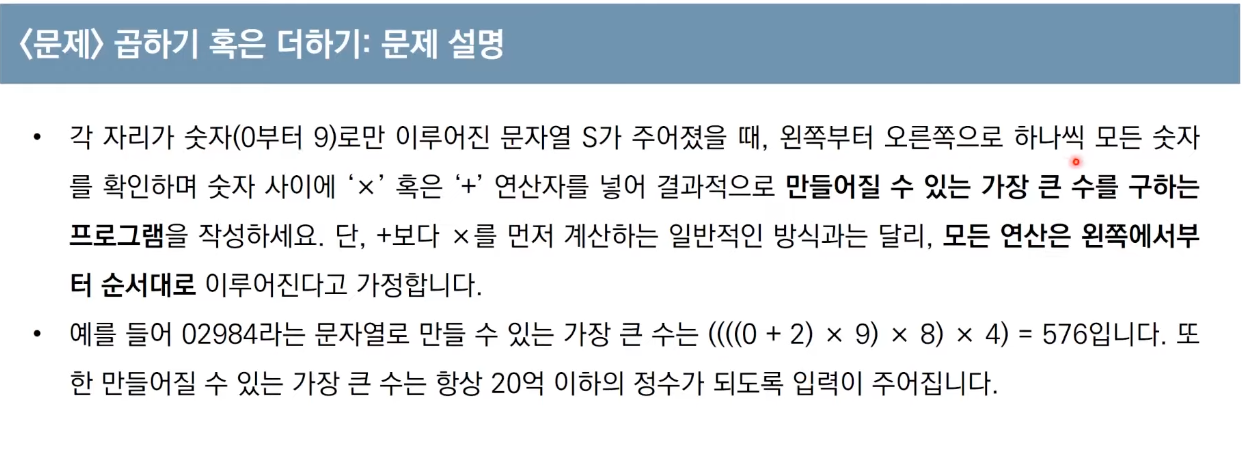

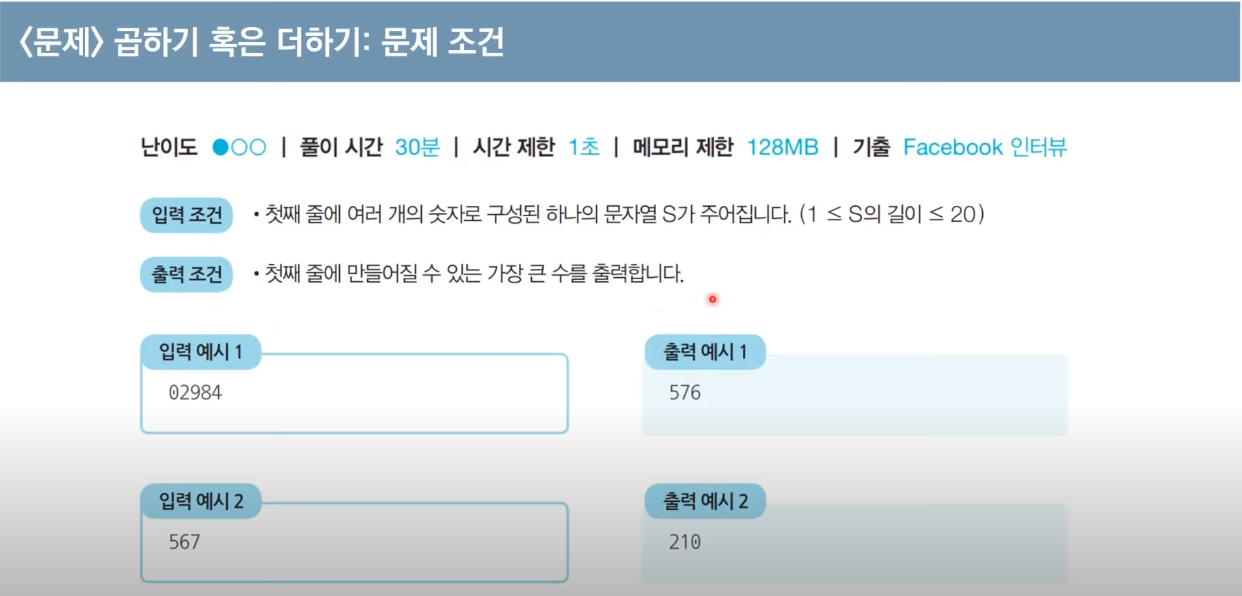

In [1]:
#만들어질 수 있는 가장 큰 수 
# 아이디어 ~ 최적의 합을 찾자 
# 0일때는 더하기 
# 나머지는 곱하기

In [29]:
data = input()

result = int(data[0])

for i in range(1, len(data)):
    num = int(data[i])
    if num <=1 or result <=1:
        result = result + num
    else:
        result = result * num
print(result)


1032
8


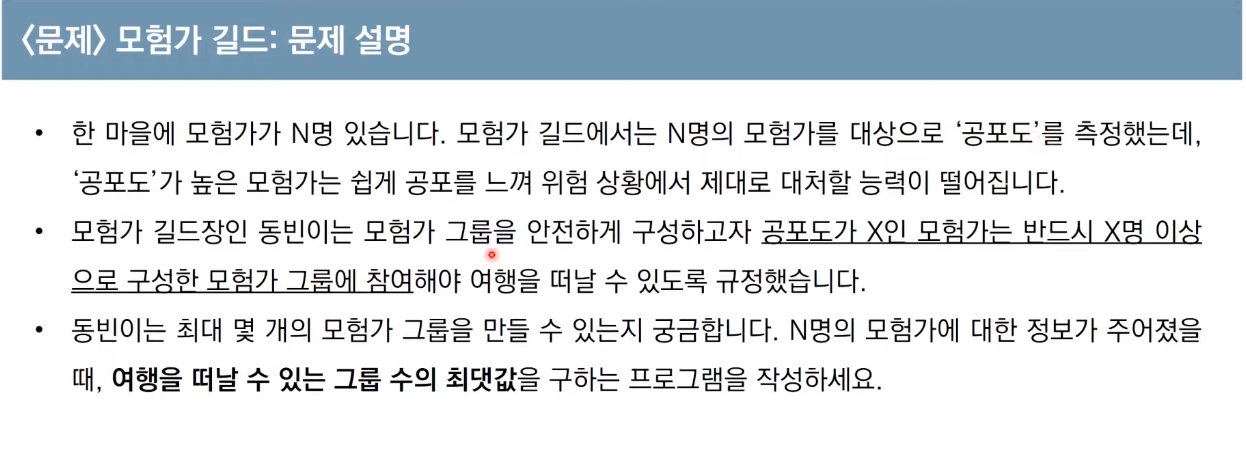

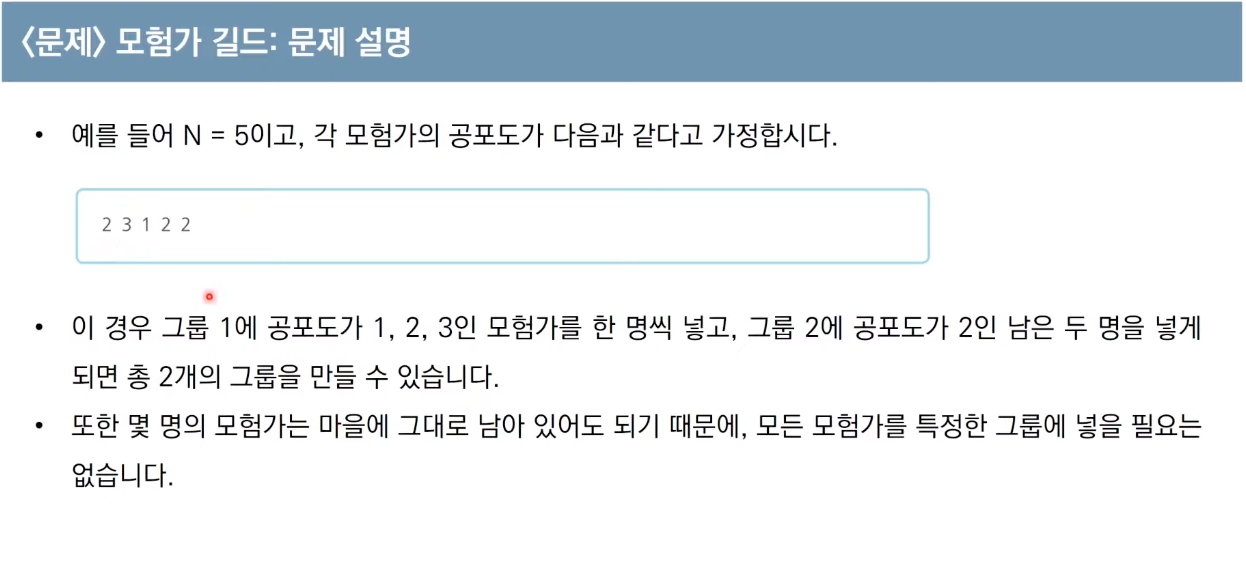

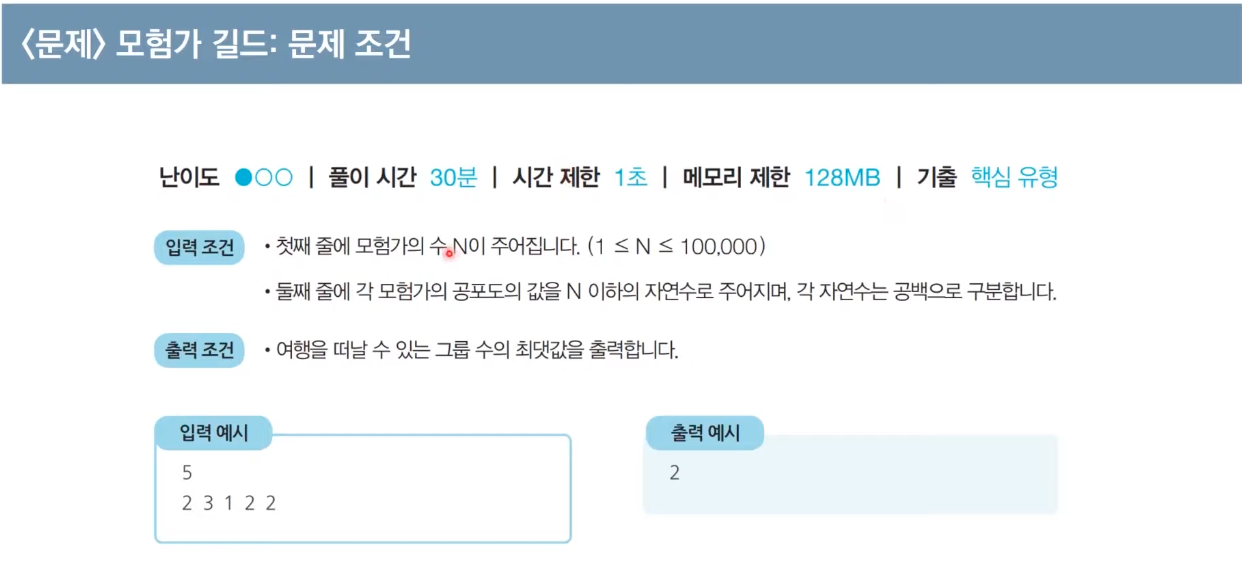

In [ ]:
#오름순으로 정렬후 5가 되면 끊고 이후에 계속 5가되면 끊는 것 ✅

In [5]:
fear = int(input())
people = list(map(int,input().split()))
people.sort()

#현재 그룹에 포함된 모험가의 수  
count = 0
#총그룹수
group = 0 


for i in people: # 공포도가 낮은 것부터 하나씩 확인하며 1 2 3
    count += 1 # 현재 그룹에 해당 모험가를 포함시키기 +1 +2 +3
    if count >= i: #만약에 모험가의 수가 현재 공포도 이상이라면, 그룹결성 
        group = group + 1 # 총 그룹수의 수 증가시키기 
        count = 0  # 현재 그룹에 포함된 모함가의 수 초기화 
              
print(group)
        


5
1 3 2 3 5
2
